# This script contains the following:
1. Importing libraries and data 
2. Data Cleaning
3. The elbow technique
4. k-means clustering

# Importing libraries and data 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [4]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
path = r'C:\Users\sruth\OneDrive\Desktop\Career Foundry\Data Immersion\A6-Advanced Analytics & Dashboard design\6.5 unsupervised machine learning-Clustering'

In [6]:
df_bank = pd.read_csv(os.path.join(path, 'Data','Prepared data','Bank Transactions2.csv'))

# Data Cleaning

In [7]:
df_bank.shape

(660304, 16)

In [8]:
df_bank.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,month of transaction,Trans_monthname,Month_spend,Age_Group,Age_Category,State
0,T3,C4417068,1996-11-26,F,Mumbai,17874.44,2016-02-08,15:38:32,459.0,26,2,Feb,Low spending Month,26-35,Low spenders,Maharashtra
1,T4,C5342380,1973-09-14,F,Mumbai,866503.21,2016-02-08,15:38:34,2060.0,50,2,Feb,Low spending Month,45+,Medium spenders,Maharashtra
2,T5,C9031234,1988-03-24,F,Mumbai,6714.43,2016-02-08,02:19:16,1762.5,35,2,Feb,Low spending Month,26-35,High spenders,Maharashtra
3,T7,C7126560,1992-01-26,F,Mumbai,973.46,2016-02-08,00:16:46,566.0,31,2,Feb,Low spending Month,26-35,High spenders,Maharashtra
4,T8,C1220223,1982-01-27,M,Mumbai,95075.54,2016-02-08,23:22:17,148.0,41,2,Feb,Low spending Month,36-45,Medium spenders,Maharashtra


In [9]:
# Create a DF with required columns
df_bank_sub=df_bank[['Age','TransactionAmount (INR)','CustAccountBalance']]


In [10]:
df_bank_sub['Age'].value_counts()

0     94222
33    44583
32    43182
34    42720
31    39465
35    39433
36    37080
37    33302
30    31028
38    30404
39    27375
40    23265
41    21920
29    21020
42    18792
43    16232
44    15577
45    13234
46    11617
28    11560
47    10065
48     8498
49     7059
27     6448
50     6416
26     3631
25     1208
24      416
23      146
21       79
22       74
18       46
19       31
16       23
2        22
20       20
17       17
11       16
13       16
9        15
14       14
3         9
15        9
10        8
7         4
12        1
8         1
5         1
Name: Age, dtype: int64

In [11]:
df_bank_sub.shape

(660304, 3)

In [12]:
# create a new df with exclude age 0
df_bank_age= df_bank_sub[df_bank_sub['Age'] != 0]

In [13]:
df_bank_age.head()

,Age,TransactionAmount (INR),CustAccountBalance
0,26,459.0,17874.44
1,50,2060.0,866503.21
2,35,1762.5,6714.43
3,31,566.0,973.46
4,41,148.0,95075.54


In [14]:
df_bank_age['Age'].value_counts()

33    44583
32    43182
34    42720
31    39465
35    39433
36    37080
37    33302
30    31028
38    30404
39    27375
40    23265
41    21920
29    21020
42    18792
43    16232
44    15577
45    13234
46    11617
28    11560
47    10065
48     8498
49     7059
27     6448
50     6416
26     3631
25     1208
24      416
23      146
21       79
22       74
18       46
19       31
16       23
2        22
20       20
17       17
11       16
13       16
9        15
14       14
3         9
15        9
10        8
7         4
12        1
8         1
5         1
Name: Age, dtype: int64

In [15]:
# check how many transactions with TransactionAmount (INR)']==
(df_bank_age['TransactionAmount (INR)']==0).value_counts()

False    565646
True        436
Name: TransactionAmount (INR), dtype: int64

In [16]:
# Exclude the transactions with 'TransactionAmount (INR)']==0,it doesnt makes any sense.
df_bank_age=df_bank_age[df_bank_age['TransactionAmount (INR)'] != 0]

In [17]:
(df_bank_age['TransactionAmount (INR)']==0).value_counts()

False    565646
Name: TransactionAmount (INR), dtype: int64

In [18]:
## check missing value
df_bank_age.isnull().sum() # no missing value

Age                        0
TransactionAmount (INR)    0
CustAccountBalance         0
dtype: int64

In [19]:
## Check duplicates
dups=df_bank_age.duplicated() # no duplicates

In [20]:
dups.shape

(565646,)

# 2. The elbow technique

In [21]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [22]:
 # Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_bank_age).score(df_bank_age) for i in range(len(kmeans))]

C:\Users\sruth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sruth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sruth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sruth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sruth\anaconda3\lib\site-packages\sklearn\clust

In [23]:
score

[-9.178849961145555e+16,
 -4.309723461729486e+16,
 -2.5599237241276076e+16,
 -1.6195640730846048e+16,
 -1.0736743108128564e+16,
 -7550571542005122.0,
 -5806825601796040.0,
 -4528408686836601.0,
 -3592204966766704.0]

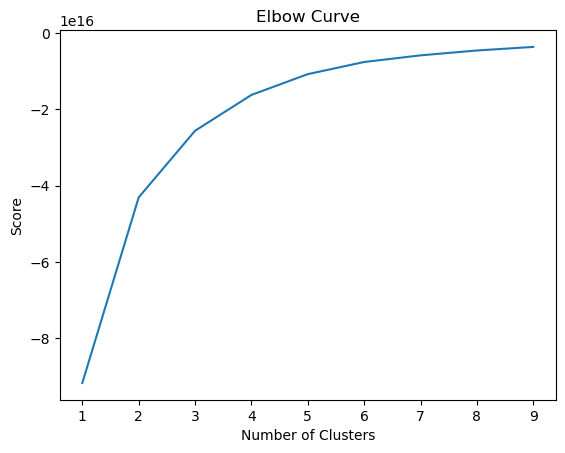

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## There's a large jump from two to three and  after four on the x-axis, the curve straightens out. This means that the optimal count for your clusters is  four.

# 3. k-means clustering

In [25]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [26]:
# Fit the k-means object to the data.

kmeans.fit(df_bank_age)

C:\Users\sruth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [27]:
# create a new column in df with values correspond to which cluster
df_bank_age['clusters'] = kmeans.fit_predict(df_bank_age)

C:\Users\sruth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
df_bank_age.head()

,Age,TransactionAmount (INR),CustAccountBalance,clusters
0,26,459.0,17874.44,0
1,50,2060.0,866503.21,2
2,35,1762.5,6714.43,0
3,31,566.0,973.46,0
4,41,148.0,95075.54,0


In [29]:
df_bank_age['clusters'].value_counts()

0    549084
2     15074
1      1417
3        71
Name: clusters, dtype: int64

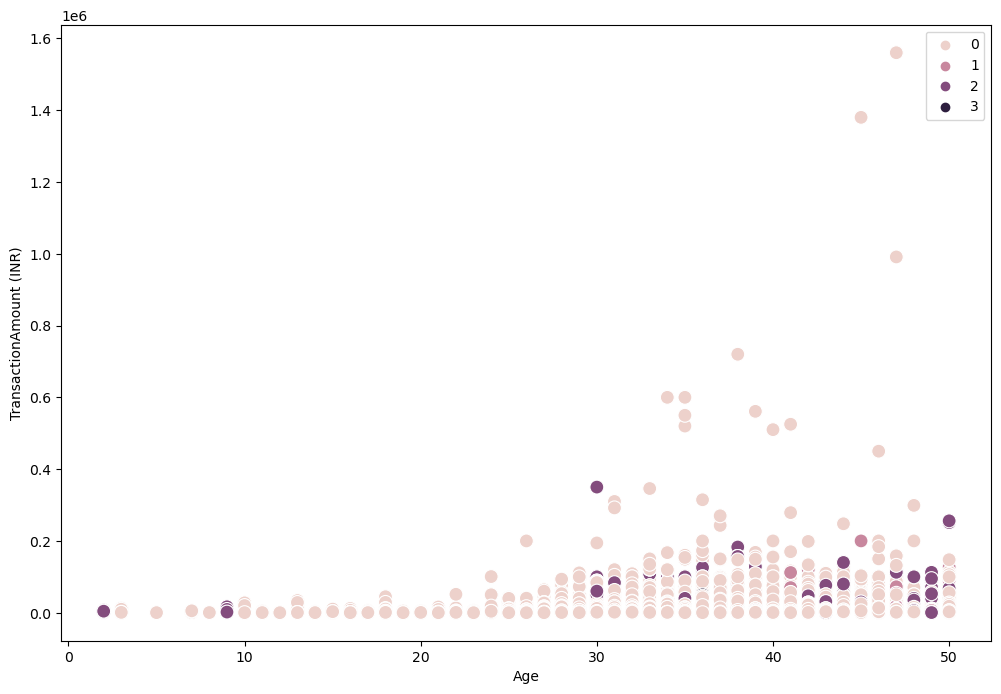

In [30]:
# Plot the clusters for the "Age" and "TransactionAmount (INR)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_bank_age['Age'], y=df_bank_age['TransactionAmount (INR)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('TransactionAmount (INR)') # Label y-axis.
plt.show()

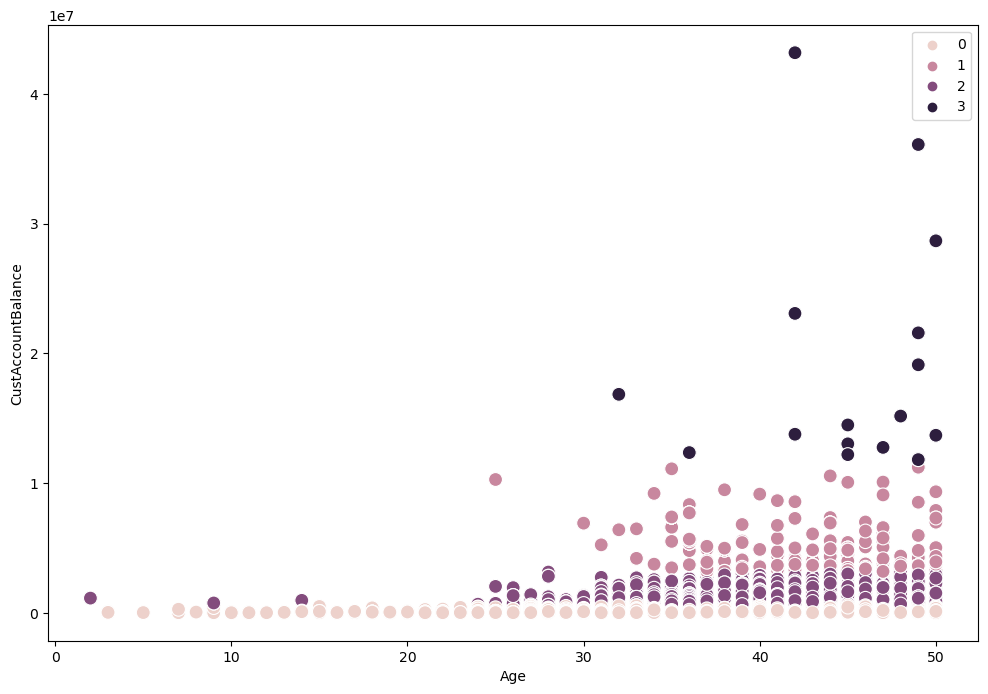

In [31]:
# Plot the clusters for the "Age" and "CustAccountBalance" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_bank_age['Age'], y=df_bank_age['CustAccountBalance'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Age') 
plt.ylabel('CustAccountBalance') 
plt.show()

In [32]:
# Relabel the cluster from number to name
df_bank_age.loc[df_bank_age['clusters'] == 3, 'cluster'] = 'dark purple'
df_bank_age.loc[df_bank_age['clusters'] == 2, 'cluster'] = 'purple'
df_bank_age.loc[df_bank_age['clusters'] == 1, 'cluster'] = 'pink'
df_bank_age.loc[df_bank_age['clusters'] == 0, 'cluster'] = 'Light pink'

In [33]:
# Descriptive analysis of clusters
df_bank_age.groupby('cluster').agg({'Age':['mean', 'median'], 
                         'CustAccountBalance':['mean', 'median'], 
                         'TransactionAmount (INR)':['mean', 'median']})

Age        CustAccountBalance               \
                  mean median               mean       median   
cluster                                                         
Light pink   36.197638   35.0       4.937166e+04     16385.54   
dark purple  46.563380   48.0       1.794515e+07  15158474.07   
pink         43.042343   44.0       5.184852e+06   4831162.46   
purple       40.223630   40.0       1.096728e+06    906665.85   

            TransactionAmount (INR)           
                               mean   median  
cluster                                       
Light pink              1273.485022   435.56  
dark purple             2997.812676  2000.00  
pink                    4444.372308  1334.00  
purple                  3082.458258  1000.00

## The dark purple cluster has the greatest statistics in all categories, followed by pink, then purple, and then pale pink.
## Customers in the dark purple cluster are older, have higher account balances, and make larger transactions than those in other groups.

## From this, it is clear that as a customer gets older, their account balances and transactional or spending amounts also increase.

In [34]:
df_bank_age.to_csv(os.path.join(path,'Data','Prepared Data','Bank Transactions_cluster.csv'),index=False)